# Exploratory Data Analysis of Datasets

## Get packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pip install sodapy

In [ ]:
from sodapy import Socrata

## Reading from File

In [ ]:
crashes_columns = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20250320.csv")

<ipython-input-127-1438cdc8bee4>:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
crashes_columns

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162912,03/16/2025,15:48,BROOKLYN,11221.0,40.685734,-73.934135,"(40.685734, -73.934135)",NaN,NaN,690 PUTNAM AVE,...,Unspecified,NaN,NaN,NaN,4799170,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2162913,03/14/2025,14:50,NaN,NaN,40.681118,-73.964424,"(40.681118, -73.964424)",ATLANTIC AVE,WASHINGTON AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799595,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2162914,03/14/2025,19:00,BROOKLYN,11225.0,40.663517,-73.957210,"(40.663517, -73.95721)",BEDFORD AVE,EMPIRE BLVD,NaN,...,Unspecified,NaN,NaN,NaN,4799610,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
2162915,03/14/2025,14:00,BRONX,10474.0,40.822544,-73.885025,"(40.822544, -73.885025)",EDGEWATER RD,BRUCKNER BLVD,NaN,...,Unspecified,Unspecified,NaN,NaN,4799632,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN


## Reading from API Endpoint

In [ ]:
pip install sodapy

In [ ]:
from sodapy import Socrata

In [ ]:
#crashes_api_endpoint = "https://data.cityofnewyork.us/resource/h9gi-nx95.json"

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("h9gi-nx95", limit=1000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.shape

(1000, 29)

In [ ]:
results_df.columns

Index(['crash_date', 'crash_time', 'on_street_name', 'off_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location',
       'contributing_factor_vehicle_3', 'vehicle_type_code_3',
       'cross_street_name', 'contributing_factor_vehicle_4',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

In [ ]:
results_df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,0,...,40.62179,-73.970024,"{'latitude': '40.62179', 'longitude': '-73.970...",Unspecified,Sedan,NaN,NaN,NaN,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,BROOKLYN BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding how many null/NAN fields in data

In [ ]:
results_df.dtypes

,0
crash_date,object
crash_time,object
on_street_name,object
off_street_name,object
number_of_persons_injured,object
number_of_persons_killed,object
number_of_pedestrians_injured,object
number_of_pedestrians_killed,object
number_of_cyclist_injured,object
number_of_cyclist_killed,object


In [ ]:
results_df.isnull().sum()

,0
crash_date,0
crash_time,0
on_street_name,258
off_street_name,550
number_of_persons_injured,0
number_of_persons_killed,0
number_of_pedestrians_injured,0
number_of_pedestrians_killed,0
number_of_cyclist_injured,0
number_of_cyclist_killed,0


## Geo Mapping Datapoints

In [ ]:
pip install geodatasets

In [ ]:
import geopandas as gdp
import geodatasets
from shapely.geometry import Point
from geopandas import GeoDataFrame
from geodatasets import get_path
import seaborn as sns

In [ ]:
import plotly.express as px

In [ ]:
results_df.latitude = pd.to_numeric(results_df.latitude)
results_df.longitude = pd.to_numeric(results_df.longitude)
results_df.number_of_persons_injured = pd.to_numeric(results_df.number_of_persons_injured)

In [ ]:
testin = results_df.number_of_persons_injured

In [ ]:
sorted(testin, reverse=True)

[7,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Map without clustering

In [ ]:
color_scale = [(0,"orange"), (1, "red")]
fig = px.scatter_mapbox(results_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="on_street_name",
                        hover_data=["crash_date", "crash_time"],
                        size = "number_of_persons_injured",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Map with clustering

In [ ]:
fig.update_traces(cluster=dict(enabled=True))
fig.show()

In [ ]:
danger_classifications = {
    "Safe",
    "Cautious",
    "Dangerous"
}

### Brainstorming
Add additional classification column to dataframe that classifies the danger level based on the amount of persons injured, killed, pedestrians injured killed, drivers injured killed, crashes and anything else relevant.

Classification column will act as ground truth label (y), and other data points will act as input (x) to a model OR a function.

* To classify datapoints This can be a function that does this initially and during productions, or we can use a function initially, then use a decision tree model to classify future datapoints gotten from users.

This will be fed to some other classification model to do the final classification based on the GPS location (lat, long)

# Model Training

## Data Cleaning and Encoding

## Data Cleaning and Encoding

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 10000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("h9gi-nx95", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

* One hot encode injured persons for label (y)

In [ ]:
classification_id = []
for i in results_df.number_of_persons_injured:
  if(int(i) == 0):            # Safe
    classification_id.append(0)
  elif(int(i) <= 2 and int(i) > 0):                        # Caution
    classification_id.append(1)
  else:                               # Dangerous
    classification_id.append(2)

In [ ]:
results_df["classification_id"] = classification_id

* Encode borough for input

In [ ]:
ohe_borough = []
for i in results_df.borough:
  if(i == "BROOKLYN"):
    ohe_borough.append(0)
  elif(i == "BRONX"):
    ohe_borough.append(1)
  elif(i == "MANHATTAN"):
    ohe_borough.append(2)
  elif(i == "STATEN_ISLAND"):
    ohe_borough.append(3)
  else:  #QUEENS
    ohe_borough.append(4)

In [ ]:
results_df["ohe_borough"] = ohe_borough

* Encode crash time for input

In [ ]:
from datetime import datetime
time_format = "%H:%M"
ohe_crash_time = []
for i in results_df.crash_time:
  timeObject = datetime.strptime(i,time_format)
  hours = timeObject.hour
  minutes = timeObject.minute
  seconds = timeObject.second
  time_in_seconds = (hours*3600) + (minutes * 60) + seconds
  ohe_crash_time.append(time_in_seconds)


In [ ]:
results_df["ohe_crash_time"] = ohe_crash_time

In [ ]:
test = pd.to_datetime(results_df['crash_date'])
print(test)
print(test.dtype)
print(test.iloc[0].date().month)
print(test.iloc[0].date().day)
print(test.iloc[0].date().year)
print(test.iloc[0].date().weekday()) # Weekday 0 - 6 , Mon - Sun

0      2021-09-11
1      2022-03-26
2      2023-11-01
3      2022-06-29
4      2022-09-21
          ...    
9995   2021-09-17
9996   2021-09-18
9997   2021-09-18
9998   2021-09-17
9999   2021-09-18
Name: crash_date, Length: 10000, dtype: datetime64[ns]
datetime64[ns]
9
11
2021
5


In [ ]:
ohe_dayOfWeek = []
ohe_month = []
for i in results_df.crash_date:
  selectedDateTime = pd.to_datetime(i).date()
  weekDay = selectedDateTime.weekday()
  month = selectedDateTime.month
  ohe_dayOfWeek.append(weekDay)
  ohe_month.append(month)

In [ ]:
results_df["ohe_dayOfWeek"] = ohe_dayOfWeek
results_df["ohe_month"] = ohe_month

* For features, one hot encode Borough, location is just latitude and longitude in a tuple so not useful, zipcode reduces accuracy

* latitude, longitude, and crash time (would be current time from device) are the most useful and are metrics we can actually get from device to feed to model



* Remove all rows will null in it

In [ ]:
features = ["latitude", "longitude", "ohe_crash_time", "ohe_dayOfWeek", "ohe_month"]

In [ ]:
results_df.shape

(10000, 34)

In [ ]:
results_df.dropna(subset=features,inplace=True)

In [ ]:
results_df.shape

(9157, 34)

In [ ]:
results_df.isna().sum()

,0
crash_date,0
crash_time,0
on_street_name,2600
off_street_name,4889
number_of_persons_injured,0
number_of_persons_killed,0
number_of_pedestrians_injured,0
number_of_pedestrians_killed,0
number_of_cyclist_injured,0
number_of_cyclist_killed,0


In [ ]:
X = results_df[features]
y = results_df.classification_id

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6468340611353712


In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(features[i]) + ", Score " + str(v))

Feature: latitude, Score 0.2965725519798474
Feature: longitude, Score 0.3268344978723389
Feature: ohe_crash_time, Score 0.31383599837124504
Feature: ohe_dayOfWeek, Score 0.03351216912803475
Feature: ohe_month, Score 0.029244782648533894


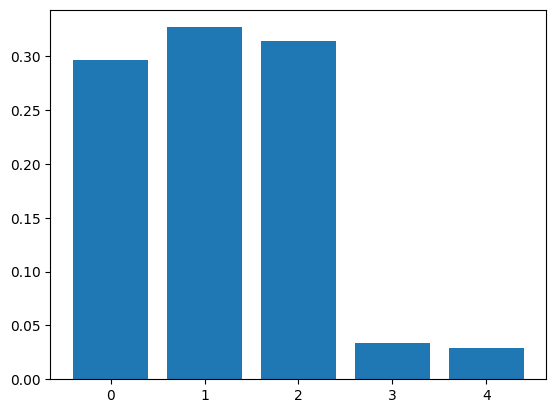

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
print(X_test.shape)

(1832, 5)


In [ ]:
y_pred = clf.predict_proba(X_test)

In [ ]:
y_pred

array([[0.71162579, 0.26930064, 0.01907357],
       [0.6230179 , 0.35242967, 0.02455243],
       [0.50925926, 0.49074074, 0.        ],
       ...,
       [0.6230179 , 0.35242967, 0.02455243],
       [0.6064257 , 0.36144578, 0.03212851],
       [0.67008047, 0.30577908, 0.02414045]])

In [ ]:
pred_avg = np.average(y_pred, axis=1)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
clf = RandomForestClassifier(max_depth=5)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
clf_search = RandomizedSearchCV(clf,
                         param_distributions = param_dist,
                         n_iter = 5,
                         cv = 5)

In [ ]:
clf_search.fit(X_train,y_train)
#clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad2baf16ad0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad2b8483b50>})

In [ ]:
best_clf = clf_search.best_estimator_
print("Best hyperparameters: ", clf_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'n_estimators': 292}


In [ ]:
clf = best_clf

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6495633187772926


In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(features[i]) + ", Score " + str(v))

Feature: latitude, Score 0.26607339854275835
Feature: longitude, Score 0.1731981397107317
Feature: ohe_crash_time, Score 0.4408610514851864
Feature: ohe_dayOfWeek, Score 0.039749344105379836
Feature: ohe_month, Score 0.0801180661559439


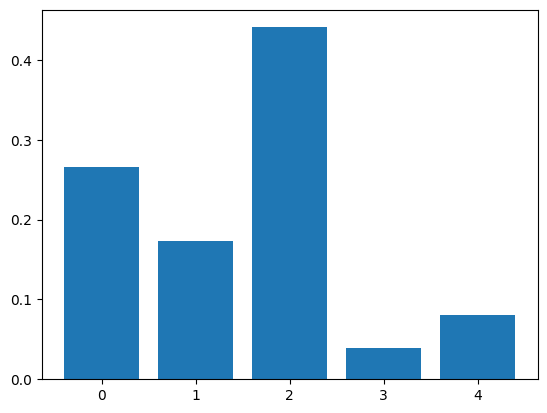

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
y_pred = clf.predict_proba(X_test)

In [ ]:
y_pred

array([[0.68693551, 0.29224699, 0.02081749],
       [0.63108778, 0.34311517, 0.02579706],
       [0.65371972, 0.32422697, 0.02205331],
       ...,
       [0.62496879, 0.34464196, 0.03038925],
       [0.66104335, 0.31445892, 0.02449773],
       [0.64449089, 0.32699261, 0.0285165 ]])

In [ ]:
pred_avg = np.average(y_pred, axis=1)
pred_avg

array([0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
       0.33333333])

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel="linear")

In [ ]:
clf = clf.fit(X_train,y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

In [ ]:
importance = clf.feature_importances_

In [ ]:
for i, v in enumerate(importance):
  print("Feature: " + str(i) + ", Score " + str(v))

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## TabPFN

https://github.com/PriorLabs/TabPFN

## Using Pickle

In [ ]:
from pickle import dump
with open("decision_tree.pkl", "wb") as f:
    dump(clf, f, protocol=5)

* Note: Using ONNX, only one input into model is supported, cannot use for decision tree


Try out for training
* Try crash Date (month and day)
* Maybe have additonal column as day of the week (SMTWTHFS)
* Clear out nulls
* Try label holidays

# New Dataset Approach

#### Create New Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pip install sodapy

In [3]:
from sodapy import Socrata

In [4]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from datetime import timedelta

In [5]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 10000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("h9gi-nx95", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

* Still need to convert intersection id to numbers, just combining street names for now

In [6]:
results_df.shape

(10000, 29)

In [7]:
# combine for intersection id
results_df = results_df.dropna(subset=["on_street_name", "off_street_name"])
results_df["intersection_id"] = results_df["on_street_name"].str.upper().str.strip() + " & " + results_df["off_street_name"].str.upper().str.strip()

<ipython-input-7-9a9cc38d2bc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["intersection_id"] = results_df["on_street_name"].str.upper().str.strip() + " & " + results_df["off_street_name"].str.upper().str.strip()


In [8]:
results_df.shape

(4643, 30)

In [9]:
from datetime import datetime
time_format = "%H:%M"
#datetime.strptime(i,time_format)
# clean features
results_df["day_of_week"] = pd.to_datetime(results_df["crash_date"]).dt.dayofweek
results_df["hour"] = pd.to_datetime(results_df["crash_time"], errors='coerce').dt.hour
results_df["is_daytime"] = results_df["hour"].between(6, 18) # 24 hour time, so from 6 am - 8pm I think
results_df["is_nighttime"] = ~results_df["is_daytime"]

# Get all killed or injured persons
results_df["injured_or_killed"] = results_df["number_of_persons_injured"].fillna(0) + results_df["number_of_persons_killed"].fillna(0) + \
results_df["number_of_pedestrians_injured"].fillna(0) + results_df["number_of_pedestrians_killed"].fillna(0) + \
results_df["number_of_cyclist_injured"].fillna(0) + results_df["number_of_cyclist_killed"].fillna(0) + \
results_df["number_of_motorist_injured"].fillna(0) + results_df["number_of_motorist_killed"].fillna(0)

results_df["injured_or_killed"] = results_df["injured_or_killed"].astype("Int64")

# High traffic is > 3 injuries or during rush hours
results_df["high_traffic"] = (results_df["injured_or_killed"] >= 3) | results_df["hour"].between(7, 9) | results_df["hour"].between(16, 19)

<ipython-input-9-836dd3bebeb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["day_of_week"] = pd.to_datetime(results_df["crash_date"]).dt.dayofweek
<ipython-input-9-836dd3bebeb0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  results_df["hour"] = pd.to_datetime(results_df["crash_time"], errors='coerce').dt.hour
<ipython-input-9-836dd3bebeb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [10]:
# Condition type
def get_condition(row):
    if row["high_traffic"]: #0 is none
        return 1 #"high_traffic"
    elif row["is_daytime"]:
        return 2 # "daytime"
    else:
        return 3 #"nighttime"

results_df["condition_type"] = results_df.apply(get_condition, axis=1)

In [11]:
results_df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_5,vehicle_type_code_5,intersection_id,day_of_week,hour,is_daytime,is_nighttime,injured_or_killed,high_traffic,condition_type
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,WHITESTONE EXPRESSWAY & 20 AVENUE,5,2,False,True,20000020,True,high_traffic
2,2023-11-01T00:00:00.000,1:29,OCEAN PARKWAY,AVENUE K,1,0,0,0,0,0,...,NaN,NaN,OCEAN PARKWAY & AVENUE K,2,1,False,True,10000010,True,high_traffic
7,2023-11-01T00:00:00.000,8:01,WEST 35 STREET,HENRY HUDSON RIVER,0,0,0,0,0,0,...,NaN,NaN,WEST 35 STREET & HENRY HUDSON RIVER,2,8,True,False,0,True,high_traffic
10,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,NaN,NaN,SARATOGA AVENUE & DECATUR STREET,1,8,True,False,0,True,high_traffic
15,2021-12-14T00:00:00.000,14:58,3 AVENUE,EAST 43 STREET,0,0,0,0,0,0,...,NaN,NaN,3 AVENUE & EAST 43 STREET,1,14,True,False,0,False,daytime


* Month is too long, how to make faster?

In [12]:
# start 5 years before first accident recorded by month for forecasting
# should stop data leakage?
start_date = pd.to_datetime(results_df["crash_date"]).min() + pd.DateOffset(years=5)
end_date = pd.to_datetime(results_df["crash_date"]).max()

print(start_date)
print(end_date)

snapshot_dates = pd.date_range(start=start_date, end=end_date, freq="MS") #MS = months, YS = years, MS might be too long

print(snapshot_dates)

2021-04-16 00:00:00
2024-09-28 00:00:00
DatetimeIndex(['2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01'],
              dtype='datetime64[ns]', freq='MS')


In [13]:
records = []

for date in snapshot_dates:
    for intersection in results_df["intersection_id"].unique():
        results_dfi = results_df[results_df["intersection_id"] == intersection]
        crash_date_list = pd.to_datetime(results_dfi["crash_date"])

        row = {
            "prediction_time": date,
            "intersection_id": intersection,
            "accidents_6m": results_dfi[(crash_date_list >= date - timedelta(days=182)) & (crash_date_list < date)].shape[0],
            "accidents_1y": results_dfi[(crash_date_list >= date - timedelta(days=365)) & (crash_date_list < date)].shape[0],
            "accidents_5y": results_dfi[(crash_date_list >= date - timedelta(days=5*365)) & (crash_date_list < date)].shape[0],
            "accidents_daytype": results_dfi[
                (crash_date_list >= date - timedelta(days=365)) &
                (crash_date_list < date) &
                (results_dfi["day_of_week"] == date.dayofweek)
            ].shape[0]
        }

        # get the most common conditions for an accident
        cond_mode = (
            results_dfi[(crash_date_list >= date - timedelta(days=365)) & (crash_date_list < date)]["condition_type"]
            .mode()
        )
        row["condition_type"] = cond_mode[0] if not cond_mode.empty else 0 # 0 ="none"

        # get accident for the next month for prediction
        row["future_accidents_1m"] = results_dfi[(crash_date_list >= date) & (crash_date_list < date + timedelta(days=30))].shape[0]

        records.append(row)
        print(row["prediction_time"])


Streaming output truncated to the last 5000 lines.
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-01 00:00:00
2024-08-0

In [14]:
# Final cleaned data
processed_results_df = pd.DataFrame(records)

In [15]:
# Set classification
def label_safety(n):
    if n == 0:
        return 0 #"Safe"
    elif n <= 2:
        return 1 #"Caution"
    else:
        return 2 #"Dangerous"

processed_results_df["safety_level"] = processed_results_df["future_accidents_1m"].apply(label_safety)

In [16]:
processed_results_df

,prediction_time,intersection_id,accidents_6m,accidents_1y,accidents_5y,accidents_daytype,condition_type,future_accidents_1m,safety_level
0,2021-05-01,WHITESTONE EXPRESSWAY & 20 AVENUE,0,0,0,0,none,0,0
1,2021-05-01,OCEAN PARKWAY & AVENUE K,0,0,0,0,none,0,0
2,2021-05-01,WEST 35 STREET & HENRY HUDSON RIVER,0,0,0,0,none,0,0
3,2021-05-01,SARATOGA AVENUE & DECATUR STREET,0,0,0,0,none,0,0
4,2021-05-01,3 AVENUE & EAST 43 STREET,0,0,0,0,none,0,0
...,...,...,...,...,...,...,...,...,...
171990,2024-09-01,113 AVENUE & 209 STREET,0,0,1,0,none,0,0
171991,2024-09-01,GUERLAIN STREET & UNIONPORT ROAD,0,0,1,0,none,0,0
171992,2024-09-01,69 AVENUE & HARROW STREET,0,0,1,0,none,0,0
171993,2024-09-01,WEST 153 STREET & RIVERSIDE DRIVE,0,0,1,0,none,0,0


In [17]:
print( "Safe : " + str(len(processed_results_df[processed_results_df["safety_level"] == 0])))
print( "Caution : " + str(len(processed_results_df[processed_results_df["safety_level"] == 1])))
print( "Dangerous : " + str(len(processed_results_df[processed_results_df["safety_level"] == 2])))

Safe : 169671
Caution : 2324
Dangerous : 0


In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

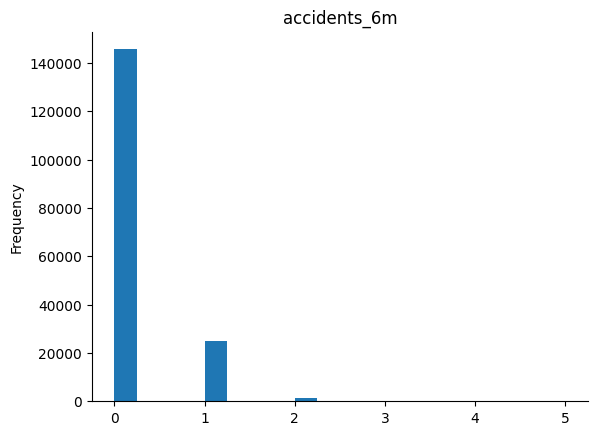

In [19]:
processed_results_df['accidents_6m'].plot(kind='hist', bins=20, title='accidents_6m')
plt.gca().spines[['top', 'right',]].set_visible(False)

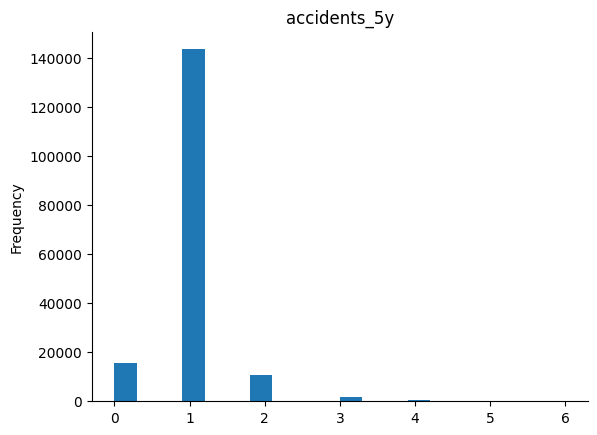

In [20]:
processed_results_df['accidents_5y'].plot(kind='hist', bins=20, title='accidents_5y')
plt.gca().spines[['top', 'right',]].set_visible(False)

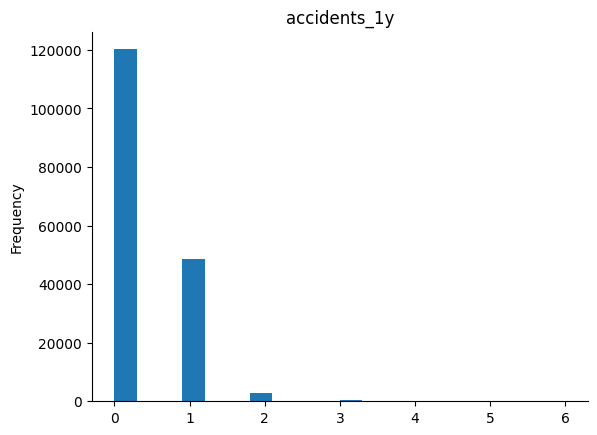

In [21]:
processed_results_df['accidents_1y'].plot(kind='hist', bins=20, title='accidents_1y')
plt.gca().spines[['top', 'right',]].set_visible(False)

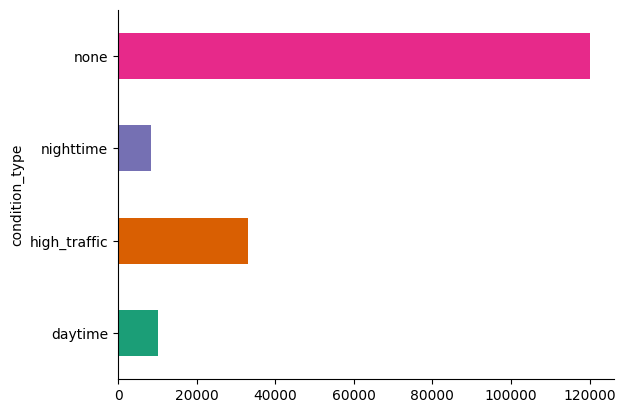

In [22]:
processed_results_df.groupby('condition_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='safety_level'>

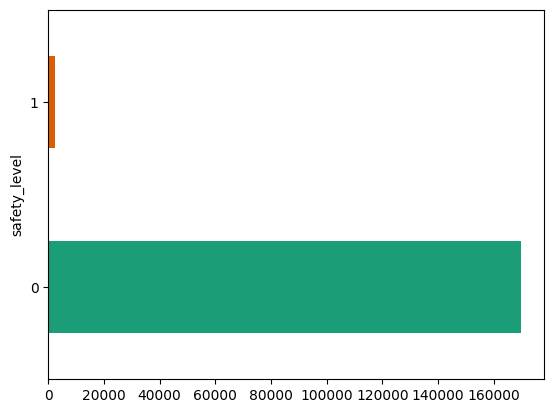

In [23]:
processed_results_df.groupby('safety_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

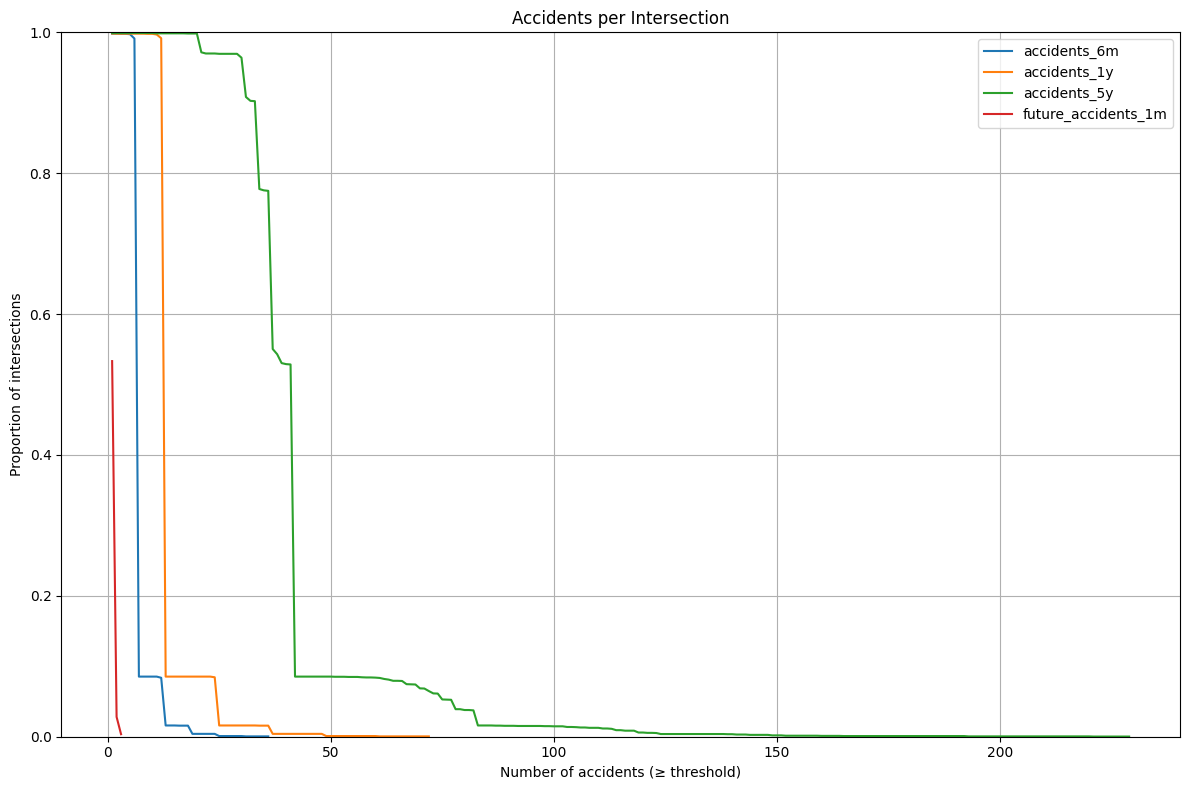

In [70]:
features = ["accidents_6m", "accidents_1y", "accidents_5y", "future_accidents_1m"]

plt.figure(figsize=(12, 8))

for feature in features:
    # Total accidents per intersection over all snapshots
    total_accidents = processed_results_df.groupby("intersection_id")[feature].sum()

    # Sort and compute thresholds
    thresholds = np.arange(1, total_accidents.max() + 1)
    proportions = [(total_accidents >= t).mean() for t in thresholds]

    # Plot CDF for this feature
    plt.plot(thresholds, proportions, label=feature)

# Customize the plot
plt.xlabel("Number of accidents (≥ threshold)")
plt.ylabel("Proportion of intersections")
plt.title("Accidents per Intersection")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

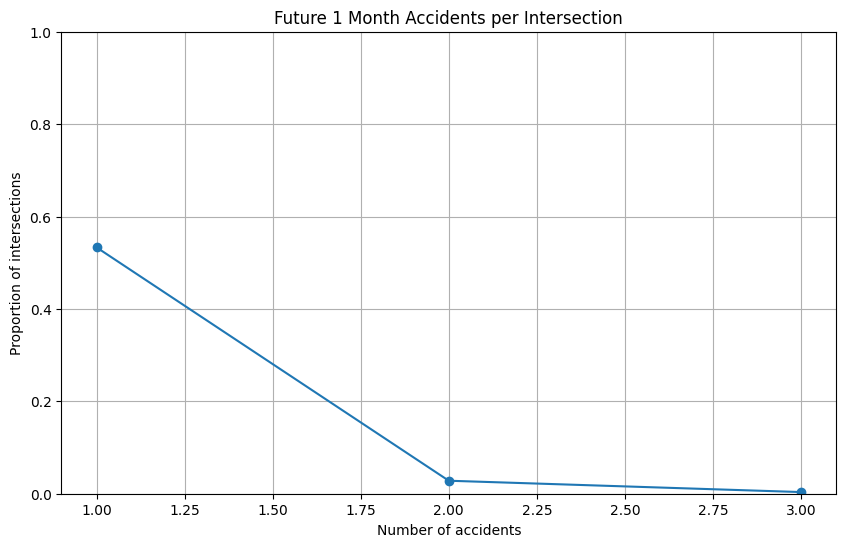

In [66]:
# proportion of locations vs number of accidents
accidents_per_location = processed_results_df.groupby("intersection_id")["future_accidents_1m"].sum()

accident_counts = accidents_per_location.sort_values()
thresholds = np.arange(1, accident_counts.max() + 1)
proportions = [(accident_counts >= t).mean() for t in thresholds]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, proportions, marker='o')
plt.xlabel("Number of accidents")
plt.ylabel("Proportion of intersections")
plt.title("Future 1 Month Accidents per Intersection")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [67]:
accidents_per_location.sort_values(ascending=False)

,future_accidents_1m
intersection_id,
FLATBUSH AVENUE & GRAND ARMY PLAZA,3
BRUCKNER BOULEVARD & HUNTS POINT AVENUE,3
MAJOR DEEGAN EXPRESSWAY & WEST FORDHAM ROAD,3
REMSEN AVENUE & FOSTER AVENUE,3
BRUCKNER BOULEVARD & WHITE PLAINS ROAD,3
...,...
YELLOWSTONE BOULEVARD & 64 ROAD,0
WYTHE AVENUE & SOUTH 9 STREET,0
WYTHE AVENUE & SOUTH 8 STREET,0


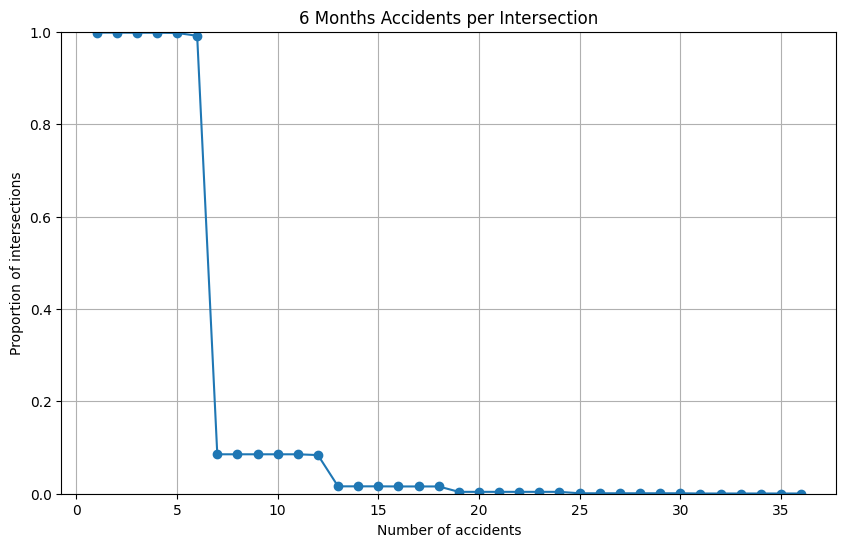

In [68]:
accidents_per_location = processed_results_df.groupby("intersection_id")["accidents_6m"].sum()

accident_counts = accidents_per_location.sort_values()
thresholds = np.arange(1, accident_counts.max() + 1)
proportions = [(accident_counts >= t).mean() for t in thresholds]
plt.figure(figsize=(10, 6))
plt.plot(thresholds, proportions, marker='o')
plt.xlabel("Number of accidents")
plt.ylabel("Proportion of intersections")
plt.title("6 Months Accidents per Intersection")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [69]:
accidents_per_location.sort_values(ascending=False)

,accidents_6m
intersection_id,
FLATBUSH AVENUE & GRAND ARMY PLAZA,36
BRUCKNER BOULEVARD & HUNTS POINT AVENUE,36
LIBERTY AVENUE & 108 STREET,30
CROSS ISLAND PARKWAY & HEMPSTEAD AVENUE,30
ROCKAWAY BOULEVARD & BREWER BOULEVARD,24
...,...
LONG ISLAND EXPRESSWAY & SPRINGFIELD BOULEVARD,0
ROCKAWAY BOULEVARD & 144 STREET,0
GOLD STREET & CONCORD STREET,0


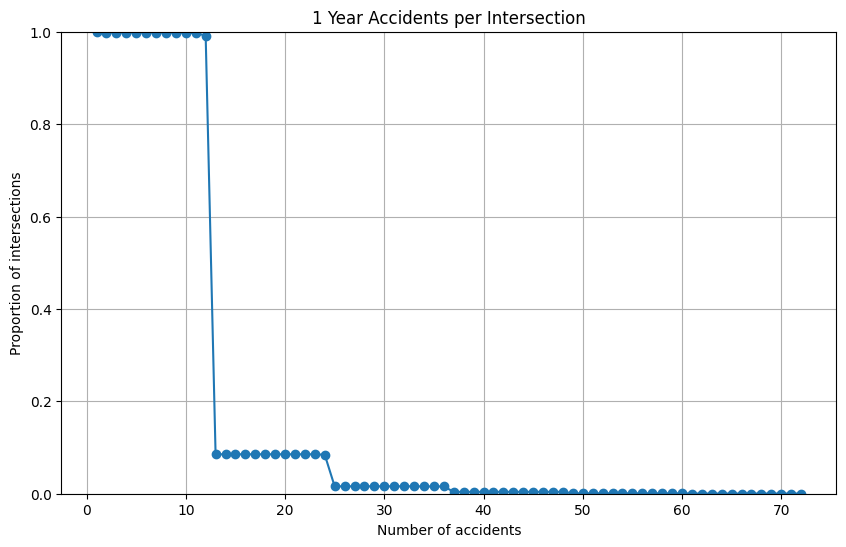

In [64]:
accidents_per_location = processed_results_df.groupby("intersection_id")["accidents_1y"].sum()

accident_counts = accidents_per_location.sort_values()
thresholds = np.arange(1, accident_counts.max() + 1)
proportions = [(accident_counts >= t).mean() for t in thresholds]
plt.figure(figsize=(10, 6))
plt.plot(thresholds, proportions, marker='o')
plt.xlabel("Number of accidents")
plt.ylabel("Proportion of intersections")
plt.title("1 Year Accidents per Intersection")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [65]:
accidents_per_location.sort_values(ascending=False)

,accidents_1y
intersection_id,
FLATBUSH AVENUE & GRAND ARMY PLAZA,72
BRUCKNER BOULEVARD & HUNTS POINT AVENUE,72
CROSS ISLAND PARKWAY & HEMPSTEAD AVENUE,60
LIBERTY AVENUE & 108 STREET,60
ROCKAWAY BOULEVARD & BREWER BOULEVARD,48
...,...
WEST 17 STREET & BAY 50 STREET,0
GOLD STREET & CONCORD STREET,0
BRUCKNER BLVD & �ST 138 STREET,0


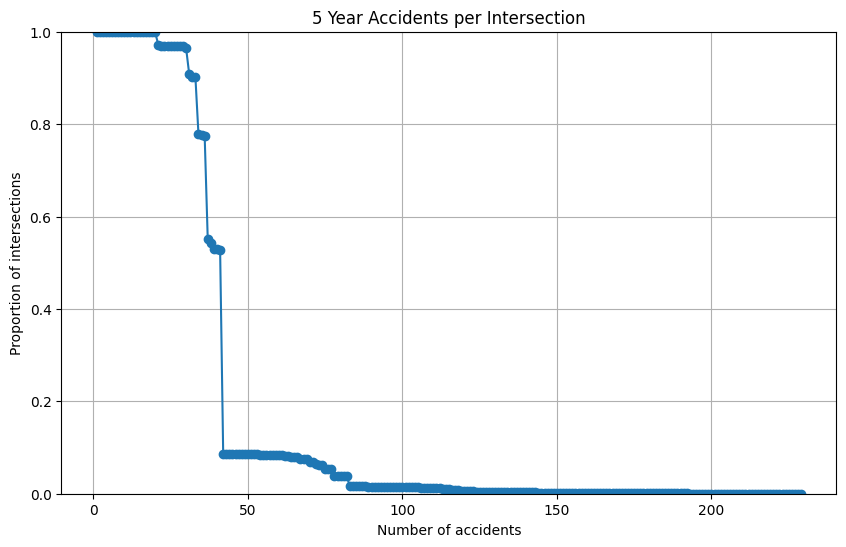

In [54]:
accidents_per_location = processed_results_df.groupby("intersection_id")["accidents_5y"].sum()

accident_counts = accidents_per_location.sort_values()
thresholds = np.arange(1, accident_counts.max() + 1)
proportions = [(accident_counts >= t).mean() for t in thresholds]
plt.figure(figsize=(10, 6))
plt.plot(thresholds, proportions, marker='o')
plt.xlabel("Number of accidents")
plt.ylabel("Proportion of intersections")
plt.title("5 Year Accidents per Intersection")
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [63]:
accidents_per_location.sort_values(ascending=False)

,accidents_5y
intersection_id,
BRUCKNER BOULEVARD & HUNTS POINT AVENUE,229
FLATBUSH AVENUE & GRAND ARMY PLAZA,220
CROSS ISLAND PARKWAY & HEMPSTEAD AVENUE,192
LIBERTY AVENUE & 108 STREET,192
SOUTH CONDUIT AVENUE & LINDEN BOULEVARD,164
...,...
WEST 35 STREET & HENRY HUDSON RIVER,10
DOUGLASTON PARKWAY & LONG ISLAND EXPRESSWAY,0
WEST 17 STREET & BAY 50 STREET,0


In [44]:
# Most dangerous Intersections by time frame
most_dangerous_predicted = processed_results_df.sort_values(by="accidents_6m", ascending=False)
most_dangerous_predicted

,prediction_time,intersection_id,accidents_6m,accidents_1y,accidents_5y,accidents_daytype,condition_type,future_accidents_1m,safety_level
21616,2021-10-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,5,5,5,0,high_traffic,0,0
21916,2021-10-01,LIBERTY AVENUE & 108 STREET,4,4,4,0,high_traffic,0,0
21353,2021-10-01,CROSS ISLAND PARKWAY & HEMPSTEAD AVENUE,4,4,4,1,high_traffic,0,0
4918,2021-06-01,SOUTH CONDUIT AVENUE & LINDEN BOULEVARD,4,4,4,1,high_traffic,0,0
9113,2021-07-01,SOUTH CONDUIT AVENUE & LINDEN BOULEVARD,4,4,4,0,high_traffic,0,0
...,...,...,...,...,...,...,...,...,...
74185,2022-10-01,LACONIA AVENUE & EAST 221 STREET,0,1,1,0,high_traffic,0,0
74186,2022-10-01,ASHLAND PLACE & MYRTLE AVENUE,0,1,1,0,daytime,0,0
74187,2022-10-01,EAST 93 STREET & PARK AVENUE,0,1,1,0,high_traffic,0,0
74188,2022-10-01,CARLTON AVENUE & PROSPECT PLACE,0,1,1,0,high_traffic,0,0


In [45]:
most_dangerous_predicted = processed_results_df.sort_values(by="accidents_1y", ascending=False)
most_dangerous_predicted

,prediction_time,intersection_id,accidents_6m,accidents_1y,accidents_5y,accidents_daytype,condition_type,future_accidents_1m,safety_level
42591,2022-03-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,2,6,6,2,high_traffic,0,0
34201,2022-01-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,3,6,6,2,high_traffic,0,0
38396,2022-02-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,3,6,6,2,high_traffic,0,0
46786,2022-04-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,1,6,6,0,high_traffic,0,0
46184,2022-04-01,FLATBUSH AVENUE & GRAND ARMY PLAZA,3,6,6,1,high_traffic,0,0
...,...,...,...,...,...,...,...,...,...
90054,2023-02-01,EAST 16 STREET & IRVING PLACE,0,0,1,0,none,0,0
90053,2023-02-01,BAISLEY BOULEVARD & FARMERS BOULEVARD,0,0,1,0,none,0,0
90052,2023-02-01,EAST 101 STREET & 2 AVENUE,0,0,1,0,none,0,0
90051,2023-02-01,ATLANTIC AVENUE & CRESCENT STREET,0,0,1,0,none,0,0


In [46]:
most_dangerous_predicted = processed_results_df.sort_values(by="accidents_5y", ascending=False)
most_dangerous_predicted

,prediction_time,intersection_id,accidents_6m,accidents_1y,accidents_5y,accidents_daytype,condition_type,future_accidents_1m,safety_level
117499,2023-09-01,FLATBUSH AVENUE & GRAND ARMY PLAZA,0,0,6,0,none,0,0
79744,2022-12-01,FLATBUSH AVENUE & GRAND ARMY PLAZA,0,2,6,1,daytime,0,0
126491,2023-11-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,0,0,6,0,none,0,0
42591,2022-03-01,BRUCKNER BOULEVARD & HUNTS POINT AVENUE,2,6,6,2,high_traffic,0,0
104914,2023-06-01,FLATBUSH AVENUE & GRAND ARMY PLAZA,0,0,6,0,none,0,0
...,...,...,...,...,...,...,...,...,...
20,2021-05-01,BOSCOBEL PLACE & UNIVERSITY AVENUE,0,0,0,0,none,0,0
19,2021-05-01,BOSTON ROAD & BRONX PARK EAST,0,0,0,0,none,0,0
18,2021-05-01,PELHAM PARKWAY SOUTH & WILLIAMSBRIDGE ROAD,0,0,0,0,none,0,0
17,2021-05-01,123 STREET & 89 AVENUE,0,0,0,0,none,0,0


In [47]:
most_dangerous_predicted = processed_results_df.sort_values(by="future_accidents_1m", ascending=False)
most_dangerous_predicted

,prediction_time,intersection_id,accidents_6m,accidents_1y,accidents_5y,accidents_daytype,condition_type,future_accidents_1m,safety_level
16837,2021-09-01,EAST 62 STREET & 1 AVENUE,0,0,0,0,none,2,1
31273,2021-12-01,WOODSIDE AVENUE & 37 AVENUE,0,0,0,0,none,2,1
30205,2021-12-01,EAST 23 STREET & FDR DRIVE,0,2,2,1,daytime,2,1
32353,2021-12-01,WEST 41 STREET & 11 AVENUE,0,0,0,0,none,2,1
30781,2021-12-01,WEST 44 STREET & 8 AVENUE,0,0,0,0,none,2,1
...,...,...,...,...,...,...,...,...,...
58746,2022-07-01,KINGSLAND AVENUE & MEEKER AVENUE,0,1,1,0,high_traffic,0,0
58747,2022-07-01,123 STREET & 89 AVENUE,0,0,0,0,none,0,0
58748,2022-07-01,PELHAM PARKWAY SOUTH & WILLIAMSBRIDGE ROAD,0,0,0,0,none,0,0
58749,2022-07-01,BOSTON ROAD & BRONX PARK EAST,1,1,1,0,nighttime,0,0


*  Duplicates in intersection_id, need to fix

In [26]:
# save to file for now to use for testing in pipeline
# processed_results_df.to_csv("processed_crash_data.csv", index=False)

## Train Model on New Dataset

In [108]:
model_dataset = processed_results_df

In [109]:
model_dataset["encoded_intersection_id"] = model_dataset["intersection_id"].astype("category").cat.codes

In [110]:
model_dataset["encoded_intersection_id"].unique()

array([4103, 3136, 3983, ...,  737, 3912, 1215], dtype=int16)

In [111]:
model_dataset["encoded_condition_type"] = model_dataset["condition_type"].astype("category").cat.codes
model_dataset["encoded_condition_type"].unique()

array([3, 0, 2, 1], dtype=int8)

* OHE intersection ID for model input

In [112]:
features = ["encoded_intersection_id", "accidents_6m", "accidents_1y", "accidents_5y", "accidents_daytype", "encoded_condition_type"]

In [113]:
X = model_dataset[features]
y = model_dataset["future_accidents_1m"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [116]:
clf = RandomForestClassifier(max_depth=5)

In [117]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
clf_search = RandomizedSearchCV(clf,param_distributions = param_dist, n_iter = 5, cv = 5)

In [118]:
clf_search.fit(X_train,y_train)
#clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b2933ec44d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b2933ec7750>})

In [119]:
best_clf = clf_search.best_estimator_
print("Best hyperparameters: ", clf_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'n_estimators': 496}


In [120]:
clf = best_clf

In [121]:
y_pred = clf.predict(X_test)

In [122]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9863658827291492


In [123]:
importance = clf.feature_importances_

In [124]:
for i, v in enumerate(importance):
  print("Feature: " + str(features[i]) + ", Score " + str(v))

Feature: encoded_intersection_id, Score 0.040041689428671715
Feature: accidents_6m, Score 0.006820221114960624
Feature: accidents_1y, Score 0.015814587623103303
Feature: accidents_5y, Score 0.9248233430566225
Feature: accidents_daytype, Score 0.002903716624918593
Feature: encoded_condition_type, Score 0.009596442151723176


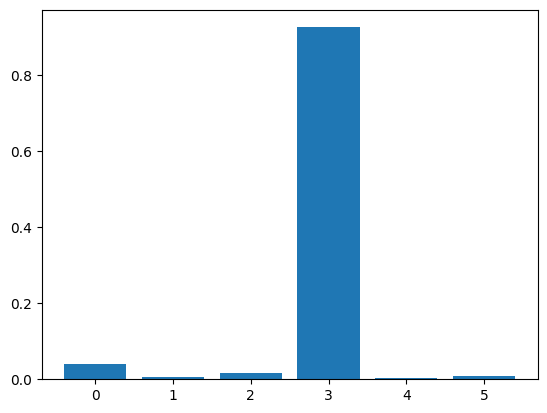

In [125]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [126]:
y_pred = clf.predict_proba(X_test)

In [127]:
y_pred

array([[9.95734579e-01, 3.95046362e-03, 3.14957740e-04],
       [9.99461086e-01, 5.30556205e-04, 8.35763091e-06],
       [9.97097079e-01, 2.76103178e-03, 1.41888951e-04],
       ...,
       [9.99441216e-01, 5.49416751e-04, 9.36767546e-06],
       [9.99524230e-01, 4.67893663e-04, 7.87587379e-06],
       [9.95782968e-01, 3.87747319e-03, 3.39559017e-04]])

In [128]:
y_pred = clf.predict(X_test)

In [129]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

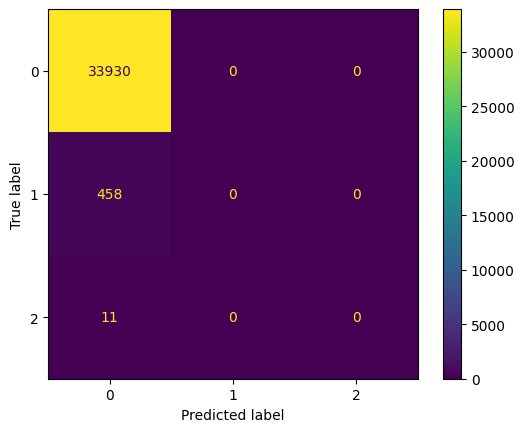

In [130]:
cm = confusion_matrix(y_test, y_pred)
conMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix = cm)
conMatrixDisplay.plot()

In [131]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99     33930\n           1       0.00      0.00      0.00       458\n           2       0.00      0.00      0.00        11\n\n    accuracy                           0.99     34399\n   macro avg       0.33      0.33      0.33     34399\nweighted avg       0.97      0.99      0.98     34399\n'